In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,classification_report

In [3]:
df = pd.read_csv("./test1.csv") # feature selection csv

In [7]:
df.sample(5)

,Unnamed: 0,FLAG_MOBIL,FLAG_CONT_MOBILE,FLAG_EMP_PHONE,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,CNT_FAM_MEMBERS,FLAG_OWN_CAR,FLAG_PHONE,AMT_REQ_CREDIT_BUREAU_YEAR,...,EMPLOYMENT_YEARS,LIVE_CITY_NOT_WORK_CITY,CNT_CHILDREN,AMT_INCOME_TOTAL,OBS_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,AMT_GOODS_PRICE,AMT_REQ_CREDIT_BUREAU_QRT,FLAG_EMAIL,TARGET
273433,298397,1,1,1,2,2,2.0,1,0,1.0,...,0.610959,0,0,112500.0,1.0,1.0,1125000.0,0.0,0,0
39717,43342,1,1,0,2,2,2.0,0,0,0.0,...,1000.665753,0,0,103500.0,4.0,4.0,513000.0,0.0,0,0
45104,49191,1,1,0,2,2,2.0,0,1,0.0,...,1000.665753,0,0,121500.0,0.0,0.0,904500.0,0.0,0,0
69340,75611,1,1,1,2,2,1.0,0,1,0.0,...,29.487671,1,0,216000.0,2.0,2.0,495000.0,0.0,0,0
93311,101858,1,1,1,2,2,2.0,0,0,1.0,...,5.926027,0,0,225000.0,0.0,0.0,450000.0,0.0,0,0


In [8]:
df['TARGET'].value_counts()

0    281818
1     24771
Name: TARGET, dtype: int64

In [9]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [10]:
df.columns

Index(['FLAG_MOBIL', 'FLAG_CONT_MOBILE', 'FLAG_EMP_PHONE',
       'REGION_RATING_CLIENT_W_CITY', 'REGION_RATING_CLIENT',
       'CNT_FAM_MEMBERS', 'FLAG_OWN_CAR', 'FLAG_PHONE',
       'AMT_REQ_CREDIT_BUREAU_YEAR', 'REG_CITY_NOT_WORK_CITY',
       'FLAG_WORK_PHONE', 'DAYS_EMPLOYED', 'EMPLOYMENT_YEARS',
       'LIVE_CITY_NOT_WORK_CITY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE',
       'AMT_GOODS_PRICE', 'AMT_REQ_CREDIT_BUREAU_QRT', 'FLAG_EMAIL', 'TARGET'],
      dtype='object')

In [55]:
df.head()

,FLAG_MOBIL,FLAG_CONT_MOBILE,FLAG_EMP_PHONE,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,CNT_FAM_MEMBERS,FLAG_OWN_CAR,FLAG_PHONE,AMT_REQ_CREDIT_BUREAU_YEAR,REG_CITY_NOT_WORK_CITY,FLAG_WORK_PHONE,DAYS_EMPLOYED,EMPLOYMENT_YEARS,LIVE_CITY_NOT_WORK_CITY,CNT_CHILDREN,AMT_INCOME_TOTAL,OBS_60_CNT_SOCIAL_CIRCLE,AMT_GOODS_PRICE,OBS_30_CNT_SOCIAL_CIRCLE,TARGET
0,1,1,1,1,1,2.0,0,1,0.0,0,0,1188,3.254795,0,0,270000.0,1.0,1129500.0,1.0,0
1,1,1,1,2,2,1.0,1,1,0.0,0,1,225,0.616438,0,0,67500.0,0.0,135000.0,0.0,0
2,1,1,1,2,2,2.0,0,0,1.0,0,0,3039,8.326027,0,0,135000.0,2.0,297000.0,2.0,0
3,1,1,1,2,2,1.0,0,0,0.0,1,0,3038,8.323288,1,0,121500.0,0.0,513000.0,0.0,0
4,1,1,1,2,2,2.0,0,1,1.0,0,1,1588,4.350685,0,0,99000.0,0.0,454500.0,0.0,0


In [56]:
df.isnull().sum()

FLAG_MOBIL                     0
FLAG_CONT_MOBILE               0
FLAG_EMP_PHONE                 0
REGION_RATING_CLIENT           0
REGION_RATING_CLIENT_W_CITY    0
CNT_FAM_MEMBERS                0
FLAG_OWN_CAR                   0
FLAG_PHONE                     0
AMT_REQ_CREDIT_BUREAU_YEAR     0
REG_CITY_NOT_WORK_CITY         0
FLAG_WORK_PHONE                0
DAYS_EMPLOYED                  0
EMPLOYMENT_YEARS               0
LIVE_CITY_NOT_WORK_CITY        0
CNT_CHILDREN                   0
AMT_INCOME_TOTAL               0
OBS_60_CNT_SOCIAL_CIRCLE       0
AMT_GOODS_PRICE                0
OBS_30_CNT_SOCIAL_CIRCLE       0
TARGET                         0
dtype: int64

<AxesSubplot: xlabel='TARGET', ylabel='count'>

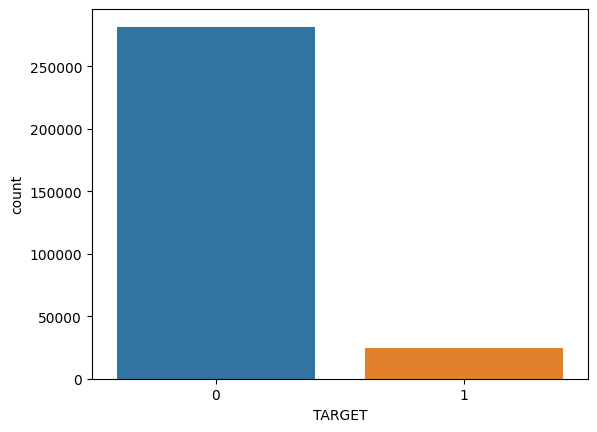

In [57]:
sns.countplot(x='TARGET', data=df)

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306589 entries, 0 to 306588
Data columns (total 20 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   FLAG_MOBIL                   306589 non-null  int64  
 1   FLAG_CONT_MOBILE             306589 non-null  int64  
 2   FLAG_EMP_PHONE               306589 non-null  int64  
 3   REGION_RATING_CLIENT         306589 non-null  int64  
 4   REGION_RATING_CLIENT_W_CITY  306589 non-null  int64  
 5   CNT_FAM_MEMBERS              306589 non-null  float64
 6   FLAG_OWN_CAR                 306589 non-null  int64  
 7   FLAG_PHONE                   306589 non-null  int64  
 8   AMT_REQ_CREDIT_BUREAU_YEAR   306589 non-null  float64
 9   REG_CITY_NOT_WORK_CITY       306589 non-null  int64  
 10  FLAG_WORK_PHONE              306589 non-null  int64  
 11  DAYS_EMPLOYED                306589 non-null  int64  
 12  EMPLOYMENT_YEARS             306589 non-null  float64
 13 

In [59]:
df = df.select_dtypes(exclude=["object"])

In [60]:
df.isnull().sum()

FLAG_MOBIL                     0
FLAG_CONT_MOBILE               0
FLAG_EMP_PHONE                 0
REGION_RATING_CLIENT           0
REGION_RATING_CLIENT_W_CITY    0
CNT_FAM_MEMBERS                0
FLAG_OWN_CAR                   0
FLAG_PHONE                     0
AMT_REQ_CREDIT_BUREAU_YEAR     0
REG_CITY_NOT_WORK_CITY         0
FLAG_WORK_PHONE                0
DAYS_EMPLOYED                  0
EMPLOYMENT_YEARS               0
LIVE_CITY_NOT_WORK_CITY        0
CNT_CHILDREN                   0
AMT_INCOME_TOTAL               0
OBS_60_CNT_SOCIAL_CIRCLE       0
AMT_GOODS_PRICE                0
OBS_30_CNT_SOCIAL_CIRCLE       0
TARGET                         0
dtype: int64

In [61]:
#null values                                                                                                        ### not required for feature selection csv but required for og csv
#df['AMT_GOODS_PRICE'] = df['AMT_GOODS_PRICE'].fillna(df['AMT_GOODS_PRICE'].mean())
#df['DAYS_LAST_PHONE_CHANGE'] = df['DAYS_LAST_PHONE_CHANGE'].fillna(df['DAYS_LAST_PHONE_CHANGE'].mean())
#df['CNT_FAM_MEMBERS'] = df['CNT_FAM_MEMBERS'].fillna(df['CNT_FAM_MEMBERS'].mean())

In [62]:
df.isnull().sum()

FLAG_MOBIL                     0
FLAG_CONT_MOBILE               0
FLAG_EMP_PHONE                 0
REGION_RATING_CLIENT           0
REGION_RATING_CLIENT_W_CITY    0
CNT_FAM_MEMBERS                0
FLAG_OWN_CAR                   0
FLAG_PHONE                     0
AMT_REQ_CREDIT_BUREAU_YEAR     0
REG_CITY_NOT_WORK_CITY         0
FLAG_WORK_PHONE                0
DAYS_EMPLOYED                  0
EMPLOYMENT_YEARS               0
LIVE_CITY_NOT_WORK_CITY        0
CNT_CHILDREN                   0
AMT_INCOME_TOTAL               0
OBS_60_CNT_SOCIAL_CIRCLE       0
AMT_GOODS_PRICE                0
OBS_30_CNT_SOCIAL_CIRCLE       0
TARGET                         0
dtype: int64

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306589 entries, 0 to 306588
Data columns (total 20 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   FLAG_MOBIL                   306589 non-null  int64  
 1   FLAG_CONT_MOBILE             306589 non-null  int64  
 2   FLAG_EMP_PHONE               306589 non-null  int64  
 3   REGION_RATING_CLIENT         306589 non-null  int64  
 4   REGION_RATING_CLIENT_W_CITY  306589 non-null  int64  
 5   CNT_FAM_MEMBERS              306589 non-null  float64
 6   FLAG_OWN_CAR                 306589 non-null  int64  
 7   FLAG_PHONE                   306589 non-null  int64  
 8   AMT_REQ_CREDIT_BUREAU_YEAR   306589 non-null  float64
 9   REG_CITY_NOT_WORK_CITY       306589 non-null  int64  
 10  FLAG_WORK_PHONE              306589 non-null  int64  
 11  DAYS_EMPLOYED                306589 non-null  int64  
 12  EMPLOYMENT_YEARS             306589 non-null  float64
 13 

In [64]:
# Scaling features of the dataset

In [65]:
from sklearn.preprocessing import StandardScaler

In [66]:
df1 = df.copy(deep=True)

In [67]:
df1= df1.drop('TARGET', axis=1)

In [68]:
x= df.drop('TARGET',axis=1)
y= df['TARGET']

In [69]:
scaler = StandardScaler()

In [70]:
x = scaler.fit_transform(x)

In [71]:
df_scaled = pd.DataFrame(scaler.fit_transform(x), columns=df1.columns, index= df1.index)

In [72]:
df_scaled.head() # scaled dataframe

,FLAG_MOBIL,FLAG_CONT_MOBILE,FLAG_EMP_PHONE,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,CNT_FAM_MEMBERS,FLAG_OWN_CAR,FLAG_PHONE,AMT_REQ_CREDIT_BUREAU_YEAR,REG_CITY_NOT_WORK_CITY,FLAG_WORK_PHONE,DAYS_EMPLOYED,EMPLOYMENT_YEARS,LIVE_CITY_NOT_WORK_CITY,CNT_CHILDREN,AMT_INCOME_TOTAL,OBS_60_CNT_SOCIAL_CIRCLE,AMT_GOODS_PRICE,OBS_30_CNT_SOCIAL_CIRCLE
0,0.0,0.042739,0.469303,-2.071132,-2.055354,-0.167294,-0.717270,1.601416,-1.007765,-0.547283,-0.498227,-0.477758,-0.477758,-0.467807,-0.577332,1.203120,-0.168947,1.611073,-0.174499
1,0.0,0.042739,0.469303,-0.104664,-0.064274,-1.265612,1.394176,1.601416,-1.007765,-0.547283,2.007118,-0.484658,-0.484658,-0.467807,-0.577332,-1.146966,-0.589493,-1.093878,-0.591331
2,0.0,0.042739,0.469303,-0.104664,-0.064274,-0.167294,-0.717270,-0.624447,-0.441531,-0.547283,-0.498227,-0.464495,-0.464495,-0.467807,-0.577332,-0.363604,0.251599,-0.653252,0.242333
3,0.0,0.042739,0.469303,-0.104664,-0.064274,-1.265612,-0.717270,-0.624447,-1.007765,1.827208,-0.498227,-0.464502,-0.464502,2.137635,-0.577332,-0.520276,-0.589493,-0.065752,-0.591331
4,0.0,0.042739,0.469303,-0.104664,-0.064274,-0.167294,-0.717270,1.601416,-0.441531,-0.547283,2.007118,-0.474892,-0.474892,-0.467807,-0.577332,-0.781397,-0.589493,-0.224867,-0.591331


In [73]:
from sklearn.model_selection import train_test_split

In [74]:
x= df_scaled # getting x feature set from scaled data frame
# y has already been taken in line 327

In [75]:
df_scaled.isna().sum()

FLAG_MOBIL                     0
FLAG_CONT_MOBILE               0
FLAG_EMP_PHONE                 0
REGION_RATING_CLIENT           0
REGION_RATING_CLIENT_W_CITY    0
CNT_FAM_MEMBERS                0
FLAG_OWN_CAR                   0
FLAG_PHONE                     0
AMT_REQ_CREDIT_BUREAU_YEAR     0
REG_CITY_NOT_WORK_CITY         0
FLAG_WORK_PHONE                0
DAYS_EMPLOYED                  0
EMPLOYMENT_YEARS               0
LIVE_CITY_NOT_WORK_CITY        0
CNT_CHILDREN                   0
AMT_INCOME_TOTAL               0
OBS_60_CNT_SOCIAL_CIRCLE       0
AMT_GOODS_PRICE                0
OBS_30_CNT_SOCIAL_CIRCLE       0
dtype: int64

In [76]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [77]:
#from imblearn.over_sampling import SMOTE  # used for imbalanced dataset 

In [78]:
#sm = SMOTE(random_state = 10000)
#X_res, y_res = sm.fit_resample(X_train,y_train)

##Training model

1. Logistic Regression

In [79]:
from sklearn.linear_model import LogisticRegression

In [80]:
model1 = LogisticRegression(solver='liblinear', n_jobs=-1, random_state=0)

In [81]:
model1.fit(X_train, y_train)

d:\VS Code\ML\project\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 6.
  warnings.warn(


LogisticRegression(n_jobs=-1, random_state=0, solver='liblinear')

In [82]:
#predcit

y_pred1 = model1.predict(X_test)
y_pred1

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [83]:
#scores
print('train score', model1.score(X_train, y_train))
print('accuracy', accuracy_score(y_test, y_pred1))
print('precision score', precision_score(y_test, y_pred1))
print('recall', recall_score(y_test, y_pred1))
print('f1 score', f1_score(y_test, y_pred1))

train score 0.9193178158037436
accuracy 0.9185883427378584
precision score 0.0
recall 0.0
f1 score 0.0


In [84]:
cm = confusion_matrix(y_test, y_pred1)
cm

array([[56326,     4],
       [ 4988,     0]], dtype=int64)

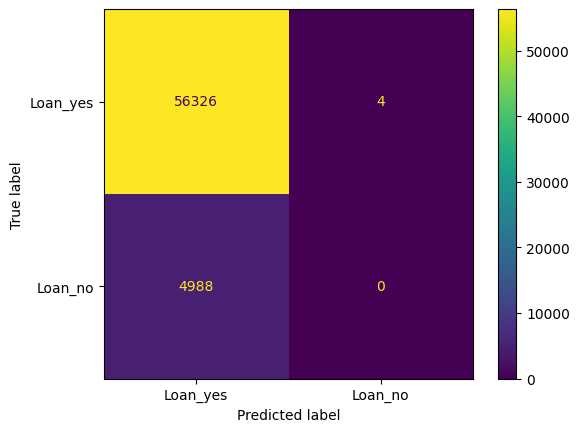

In [85]:
display = ConfusionMatrixDisplay(cm, display_labels = ['Loan_yes', 'Loan_no'])
display.plot()

In [86]:
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     56330
           1       0.00      0.00      0.00      4988

    accuracy                           0.92     61318
   macro avg       0.46      0.50      0.48     61318
weighted avg       0.84      0.92      0.88     61318



2. Random Forest

In [87]:
from sklearn.ensemble import RandomForestClassifier

In [88]:
model2 = RandomForestClassifier(n_estimators = 200)
model2.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

In [89]:
y_pred2 = model2.predict(X_test)
accuracy = model2.score(X_test, y_test)
accuracy

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [90]:
#scores
print('train score', model2.score(X_train, y_train))
print('accuracy', accuracy_score(y_test, y_pred2))
print('precision score', precision_score(y_test, y_pred2))
print('recall', recall_score(y_test, y_pred2))
print('f1 score', f1_score(y_test, y_pred2))

train score 0.9979940555548761
accuracy 0.9169085749698294
precision score 0.09774436090225563
recall 0.0026062550120288693
f1 score 0.005077133372388205


In [91]:
cm = confusion_matrix(y_test, y_pred2)
cm

array([[56210,   120],
       [ 4975,    13]], dtype=int64)

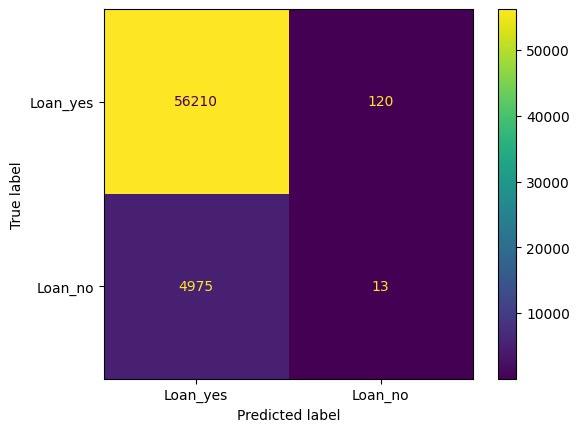

In [92]:
display = ConfusionMatrixDisplay(cm, display_labels = ['Loan_yes', 'Loan_no'])
display.plot()

In [93]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     56330
           1       0.10      0.00      0.01      4988

    accuracy                           0.92     61318
   macro avg       0.51      0.50      0.48     61318
weighted avg       0.85      0.92      0.88     61318



3. naive bayes

In [94]:
from sklearn.naive_bayes import GaussianNB
model3 = GaussianNB()
model3.fit(X_train, y_train)

GaussianNB()

In [95]:
y_pred3 = model3.predict(X_test)

In [96]:
#scores
print('train score', model3.score(X_train, y_train))
print('accuracy', accuracy_score(y_test, y_pred3))
print('precision score', precision_score(y_test, y_pred3))
print('recall', recall_score(y_test, y_pred3))
print('f1 score', f1_score(y_test, y_pred3))

train score 0.8982635533756539
accuracy 0.8971753808017222
precision score 0.14463032919589855
recall 0.053728949478749
f1 score 0.07835111825756469


In [97]:
cm = confusion_matrix(y_test, y_pred3)
cm

array([[54745,  1585],
       [ 4720,   268]], dtype=int64)

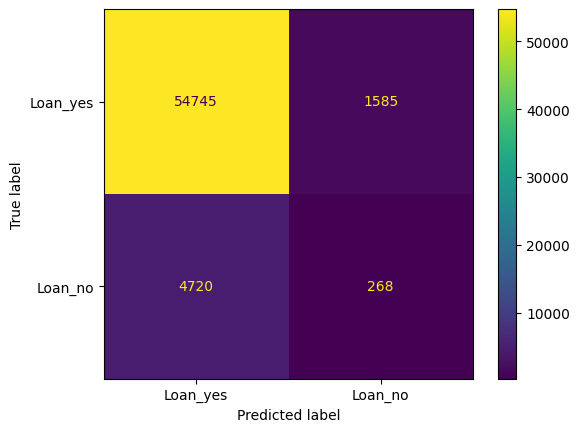

In [98]:
display = ConfusionMatrixDisplay(cm, display_labels = ['Loan_yes', 'Loan_no'])
display.plot()

In [99]:
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95     56330
           1       0.14      0.05      0.08      4988

    accuracy                           0.90     61318
   macro avg       0.53      0.51      0.51     61318
weighted avg       0.86      0.90      0.88     61318



### XGB

In [ ]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_res, y_res)
y_pred = model.predict(X_test)
accuracy = model.score(X_test, y_test)
accuracy

In [ ]:
print(classification_report(y_test,y_pred))